<h2 style="text-align:center">NNDL-CIA1</h2>

Name: Kushal Sourav B<br />
Regno: 2347125

Question - 1

XOR Gate

<p> Truth Table for XOR Gate </p>
<table>
  <thead>
    <tr>
      <th>Input 1</th>
      <th>Input 2</th>
      <th>Output</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>0</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <td>1</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

Single Layer Perceptron without MCP

In [31]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    def train(self, X, y, random_weights=True):
        n_samples, n_features = X.shape
    
        if random_weights:
            self.weights = np.random.rand(n_features)  
        else:
            self.weights = np.array([0.5, 0.5])  
        self.bias = 0.0

        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
             
                linear_output = np.dot(x_i, self.weights) + self.bias
                predicted = self.relu(linear_output)
                error = y[idx] - predicted
                gradient = error * self.relu_derivative(predicted)
                self.weights += self.learning_rate * gradient * x_i
                self.bias += self.learning_rate * gradient

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.relu(linear_output)

perceptron = Perceptron(learning_rate=0.1, epochs=100)



In [32]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
y_xor = np.array([0, 1, 1, 0])  

perceptron_xor = Perceptron(learning_rate=0.1, epochs=100)
perceptron_xor.train(X_xor, y_xor, random_weights=True)

for x, target in zip(X_xor, y_xor):
    output = perceptron_xor.predict(x)
    print(f"Input: {x} - Predicted: {round(output, 2)} - Actual: {target}")


Input: [0 0] - Predicted: 0.56 - Actual: 0
Input: [0 1] - Predicted: 0.5 - Actual: 1
Input: [1 0] - Predicted: 0.44 - Actual: 1
Input: [1 1] - Predicted: 0.39 - Actual: 0


The perceptron will struggle with the XOR gate because XOR is not linearly separable. A single-layer perceptron can only solve linearly separable problems like AND, OR, and AND-NOT. To solve XOR, you'd need a more complex model, such as a multi-layer perceptron (MLP) with non-linear activation functions.

Single Layer Perceptron  with MCP (McCulloch Pitts) Neuron

In [20]:
class SingleLayerPerceptron: 
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)  
        self.threshold = 0.5

    def activation(self, x):
        return 1 if x >= self.threshold else 0 

    def predict(self, x):
        summation = np.dot(x, self.weights)
        return self.activation(summation)

    def fit(self, X, y, epochs=10):
        for _ in range(epochs):
            for idx, x_i in enumerate(X):
                predicted = self.predict(x_i)
            
                error = y[idx] - predicted
                self.weights += error * x_i 

In [23]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
y_xor = np.array([0, 1, 1, 0])  


slp = SingleLayerPerceptron(input_size=2)  
slp.fit(X_xor, y_xor, epochs=100)  


slp_predictions = [(x, slp.predict(x)) for x in X_xor]


print("Single Layer Perceptron predictions:")  
for input_val, pred in slp_predictions:
    print(f"Input: {input_val}, Predicted Output: {pred}")


Single Layer Perceptron predictions:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


<b>Single MCP Neuron Performance:</b> The MCP neuron will also fail to correctly classify the XOR dataset because XOR is not linearly separable. Like the perceptron, the MCP neuron can only handle linearly separable problems. So, the output predictions won't match the expected XOR gate outputs

* <small>The XOR gate requires non-linear decision boundaries , it can't be separated by a single straight line in the input space.
* Both the MCP and Single Layer Perceptrons can only model linearly separable problems, so they fail on XOR classification. </small>

In [30]:

from keras.models import Sequential
from keras.layers import Dense

mlp_model = Sequential()
mlp_model.add(Dense(2, input_dim=2, activation='relu'))  
mlp_model.add(Dense(1, activation='sigmoid')) 


mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

mlp_model.fit(X_xor, y_xor, epochs=500, verbose=0)

mlp_predictions = mlp_model.predict(X_xor)
floatValues = mlp_predictions
mlp_predictions = [1 if pred > 0.5 else 0 for pred in mlp_predictions]
print(f"Predictions using Multi-Layer Perceptron: {mlp_predictions}")
print(floatValues)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predictions using Multi-Layer Perceptron: [1, 1, 1, 0]
[[0.55919135]
 [0.52284753]
 [0.5264766 ]
 [0.411234  ]]


Single Layer Perceptron:
* <small>The Single Layer Perceptron fails to classify XOR correctly. This happens because XOR is not linearly separable. 
* A Single Layer Perceptron can only handle problems where the classes can be separated by a straight line. </small>

Multi-Layer Perceptron (MLP):
* <small>The MLP, on the other hand, can handle non-linear separability. By using at least one hidden layer with non-linear activation functions the model can classify XOR correctly.
* The MLP predictions will closely match the XOR truth table </small>

Question - 2 
<p> part B </p>

Load the Dataset and preprocess 

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)


X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (25000, 200), Test data shape: (25000, 200)


understanding the X and y trains values

In [2]:
print(X_train[0]) 
print(y_train[0])

[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  103   32   15   16
 5345 

Exploratory Data Analysis

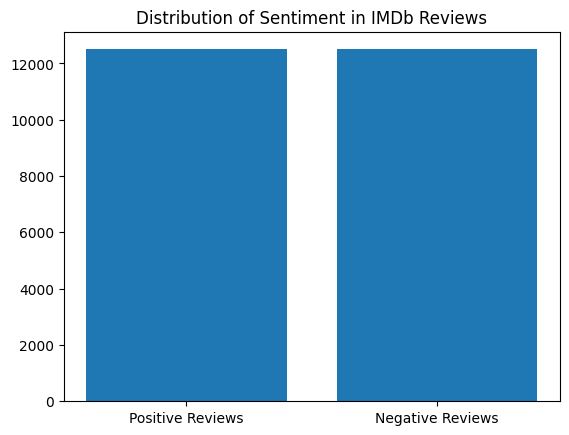

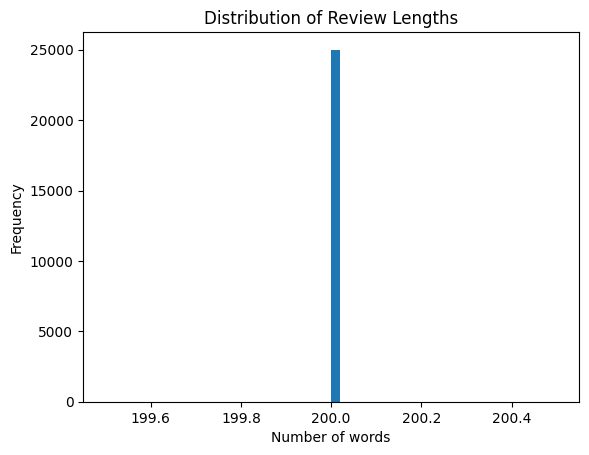

In [34]:
import matplotlib.pyplot as plt


positive_reviews = np.sum(y_train == 1)
negative_reviews = np.sum(y_train == 0)


plt.bar(['Positive Reviews', 'Negative Reviews'], [positive_reviews, negative_reviews])
plt.title('Distribution of Sentiment in IMDb Reviews')
plt.show()

review_lengths = [len(review) for review in X_train]
plt.hist(review_lengths, bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()


Model Architecture

* <small>first input layer - relu function (units 128)
* second inner input layer - relu function (units 64)
* outer layer - sigmoid function (units 1) </small>


The model consists of two hidden layers (Dense) with ReLU activation:
*  <small> The first layer has 128 neurons.
* The second layer has 64 neurons. </small>
<p>The output layer has 1 neuron with sigmoid activation, which is appropriate for binary classification.</p>

Compilation:

* <small>Adam optimizer is used for optimization.
* Binary cross-entropy is correctly used as the loss function for binary classification.
* Accuracy is included in the metrics to track during training </small>

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(200,)))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,049 (133.00 KB)

 Trainable params: 34,049 (133.00 KB)

 Non-trainable params: 0 (0.00 B)

Training the model with 1000 epoch

In [15]:

history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)


Epoch 1/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.4322 - val_accuracy: 0.5041 - val_loss: 3.5795
Epoch 2/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7090 - loss: 0.4373 - val_accuracy: 0.5030 - val_loss: 3.6685
Epoch 3/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.4297 - val_accuracy: 0.5032 - val_loss: 4.1899
Epoch 4/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 0.4424 - val_accuracy: 0.5024 - val_loss: 3.9583
Epoch 5/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7044 - loss: 0.4318 - val_accuracy: 0.5036 - val_loss: 3.3980
Epoch 6/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7065 - loss: 0.4277 - val_accuracy: 0.5038 - val_loss: 3.3094
Epoch 7/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - loss: 0.4383 - val_accuracy: 0.5007 - val_loss: 3.6908
Epoch 8/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7081 - loss: 0.4399 - 

In [18]:
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 50.29%


Model performance Evaluation


* <b>Accuracy Plot:</b> Shows how the model's accuracy improves over epochs for both training and validation sets.
* <b>Loss Plot: </b> Tracks how the loss reduces as the model learns.

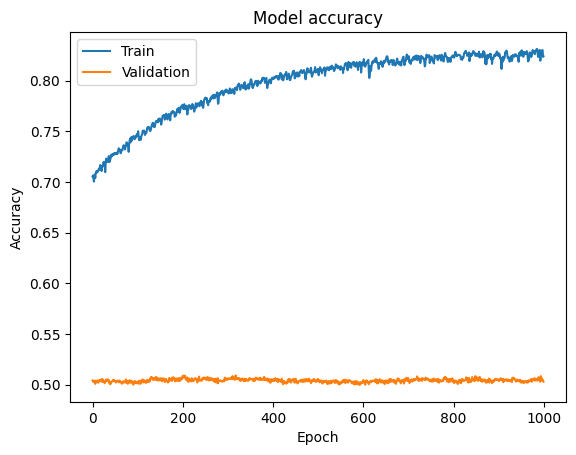

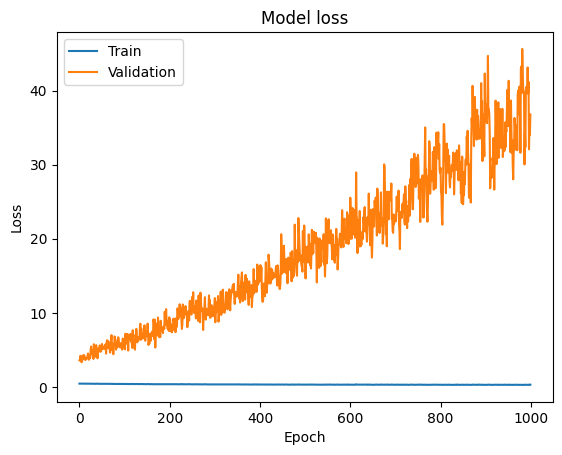

In [16]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Justifying Activation Functions</br>

ReLU Activation:
<br />

* <small> Rectified Linear Unit (ReLU) is used in the hidden layers because it helps with faster convergence and avoids the vanishing gradient problem.
* ReLU outputs 0 for negative values and the input itself for positive values, ensuring non-linear learning.</small>
<br />

Sigmoid Activation:

* <small>Sigmoid is used in the output layer for binary classification because it squashes the output between 0 and 1, which is ideal for predicting probabilities in binary tasks. </small> 
<br />


Model inference

In [17]:

predictions = model.predict(X_test)
predictions = [1 if p > 0.5 else 0 for p in predictions] 


print(predictions[:10])


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<h3>Explain why binary cross-entropy is suitable for this task. </h3>
Binary Cross-Entropy Loss:

* <small>Binary cross-entropy is ideal for binary classification problems as it measures the performance of a classification model whose output is a probability value between 0 and 1. 
* It is designed to minimize the difference between the predicted probability and the actual class.</small>